In [3]:
import os
region = 'antarctic'
PATH = f'/g/data/ps29/nd0349/datasets/USNIC/ice_charts/{region}'
files = os.listdir(PATH)
print(files)

['antarctic_2025317.kmz', 'ANTARC_WEEKLY_2025_11_07.kmz', 'antarc251107', 'nic_miz2025317sc_pl_a']


In [76]:
files

['antarctic_2025317.kmz',
 'ANTARC_WEEKLY_2025_11_07.kmz',
 'antarc251107',
 'nic_miz2025317sc_pl_a']

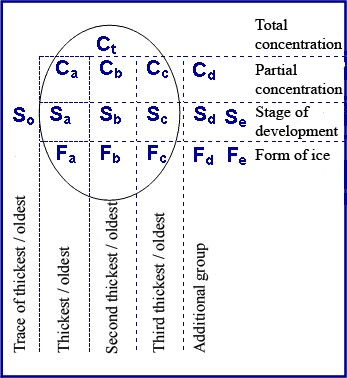

# Antarctic

## Daily Antarctic Marginal Ice Zone (MIZ) and Overlay Shapefile
A GIS format that contains analyzed ice lines and ice concentration data derived from USNIC daily ice analysis. Two GIS shapefiles created:
- **MIZ Shapefile** - contains ice lines at the ice edge and pack ice (ice concentration 80% and greater) boundaries.
- **Ice Edge Shapefile** - contains an ice line that separates ice from no ice.

In [22]:
# gdf

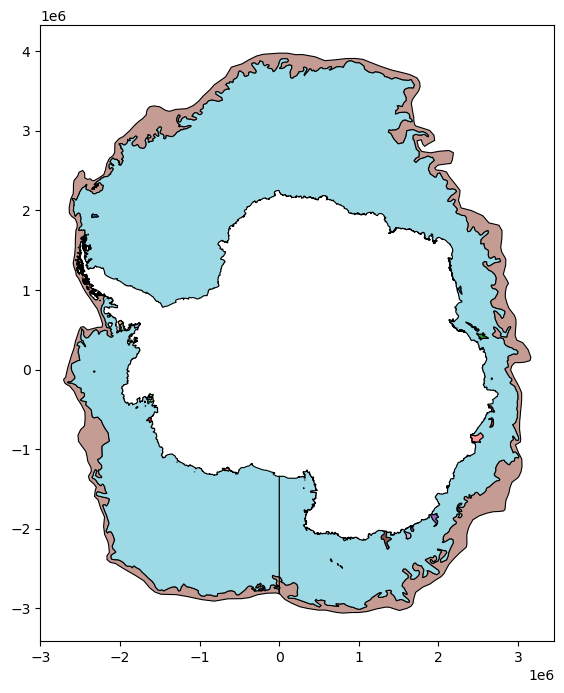

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shp_path = os.path.join(PATH, "nic_miz2025317sc_pl_a/nic_miz2025317sc_pl_a.shp")
gdf = gpd.read_file(shp_path)

# Plot
gdf_proj = gdf.to_crs(epsg=3031)
gdf_proj.plot(
    cmap='tab20',
    edgecolor='black',
    linewidth=0.8,
    legend=True,
    figsize=(8, 8)
)

plt.show()


## Daily KMZ Files
Two KMZ files are created with attributes defined by ice concentration.

- **Colorfill KMZ** - contains color-defined ice areas for the marginal ice zone (concentration up to 80%) in yellow and pack ice (ice concentration 80% and greater) in red
- **Vector KMZ** - contains color-defined ice lines for the ice edge in yellow and the marginal ice zone (concentration up to 80%) and pack ice boundary (ice concentration 80% and greater) in red.

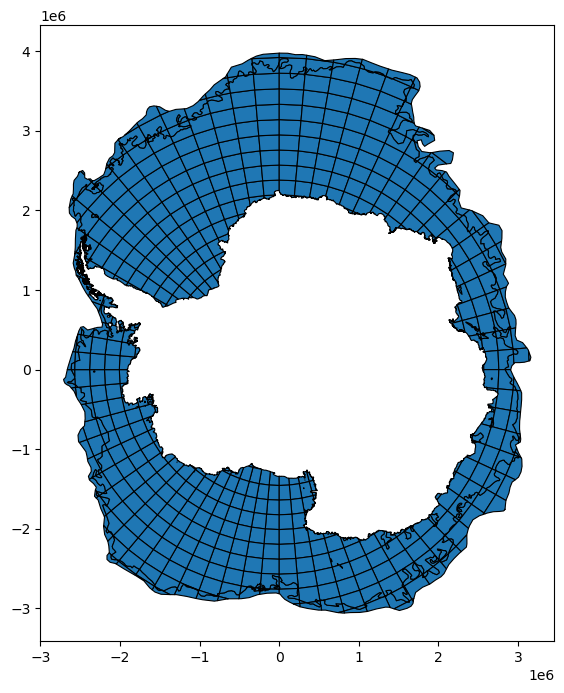

In [30]:
import zipfile
import geopandas as gpd
import os

kmz_path = os.path.join(PATH, "antarctic_2025317.kmz")
unzipped_dir = "antarctic_line_unzipped"

# Unzip the KMZ → KML
with zipfile.ZipFile(kmz_path, 'r') as z:
    z.extractall(unzipped_dir)

# Find the KML file
for f in os.listdir(unzipped_dir):
    if f.endswith(".kml"):
        kml_path = os.path.join(unzipped_dir, f)
        break

# Read KML with geopandas
gdf = gpd.read_file(kml_path, driver='KML')

gdf_proj = gdf.to_crs(epsg=3031)
gdf_proj.plot(
    # cmap='tab20',
    edgecolor='black',
    linewidth=0.8,
    legend=True,
    figsize=(8, 8)
)


# Plot
# gdf.plot(figsize=(8,8), edgecolor='red')
plt.show()

## Weekly Antarctic Shapefile
A GIS shapefile that contains vector and attribute data that separates ice conditions based on total concentration, stage of development (ice types) with respective concentrations, and forms of ice.


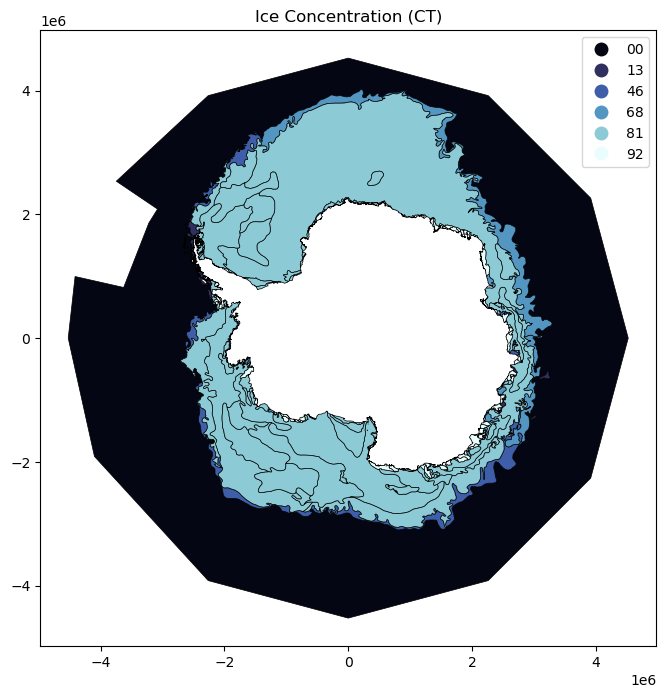

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import os

# Load shapefile
shp_path = os.path.join(PATH, "antarc251107/ANTARC251107.shp")
gdf = gpd.read_file(shp_path)

# Reproject
gdf_proj = gdf.to_crs(epsg=3031)

# Plot ice concentration (CT) with sequential palette
gdf_proj.plot(
    column="CT",              # ice concentration
    cmap=cmo.ice,      # sequential colormap
    edgecolor="black",
    linewidth=0.5,
    legend=True,              # produces a colorbar
    figsize=(8, 8),
)

plt.title("Ice Concentration (CT)")
plt.show()

In [36]:
print(gdf_proj.columns)

Index(['CT', 'CA', 'CB', 'CC', 'SO', 'SA', 'SB', 'SC', 'SD', 'FA', 'FB', 'FC',
       'FS', 'FP', 'ICECODE', 'POLY_TYPE', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')


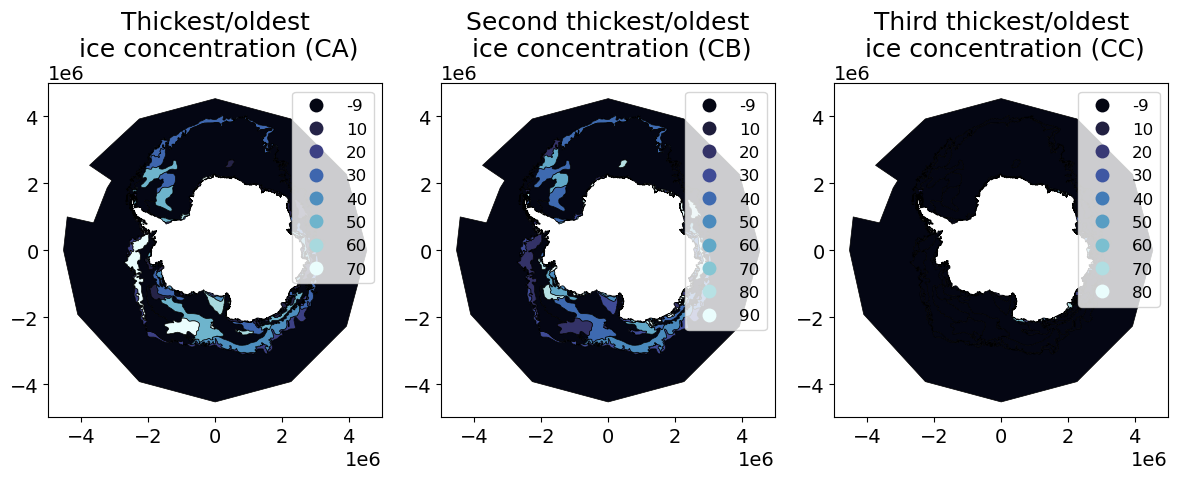

In [60]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo

plt.rcParams.update({
    'font.size': 14,           # overall font size
    'axes.labelsize': 16,      # x/y labels
    'axes.titlesize': 18,      # title
    'legend.fontsize': 12,     # legend text
    'lines.linewidth': 2       # default line width
})

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 2 columns

# First panel: CA
gdf_proj.plot(
    column="CA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Thickest/oldest\n ice concentration (CA)")

# Second panel: CB
gdf_proj.plot(
    column="CB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Second thickest/oldest\n ice concentration (CB)")

# Third panel: CC
gdf_proj.plot(
    column="CC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Third thickest/oldest\n ice concentration (CC)")


plt.tight_layout()
plt.show()

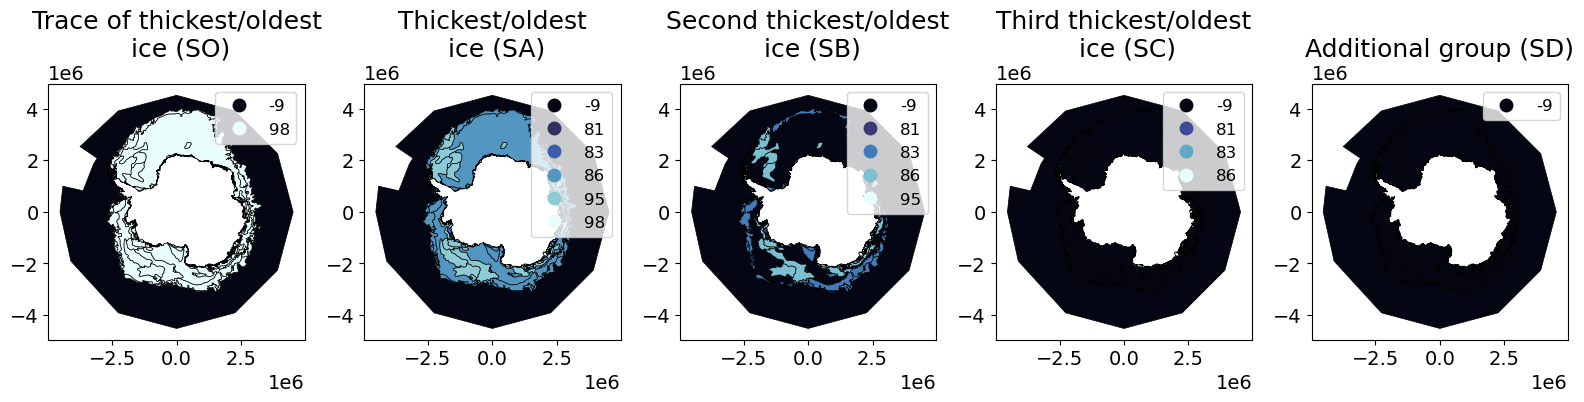

In [74]:
# 'SO', 'SA', 'SB', 'SC', 'SD'
fig, axes = plt.subplots(1, 5, figsize=(16, 6))  # 1 row, 2 columns

# First panel: SO
gdf_proj.plot(
    column="SO",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Trace of thickest/oldest\n ice (SO)")

# Second panel: SA
gdf_proj.plot(
    column="SA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Thickest/oldest\n ice (SA)")

# Third panel: SB
gdf_proj.plot(
    column="SB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Second thickest/oldest\n ice (SB)")


# Fourth panel: SC
gdf_proj.plot(
    column="SC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[3]  # assign to second subplot
)
axes[3].set_title("Third thickest/oldest\n ice (SC)")


# Fifth panel: SD
gdf_proj.plot(
    column="SD",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[4]  # assign to second subplot
)
axes[4].set_title("Additional group (SD)")


plt.tight_layout()
plt.show()

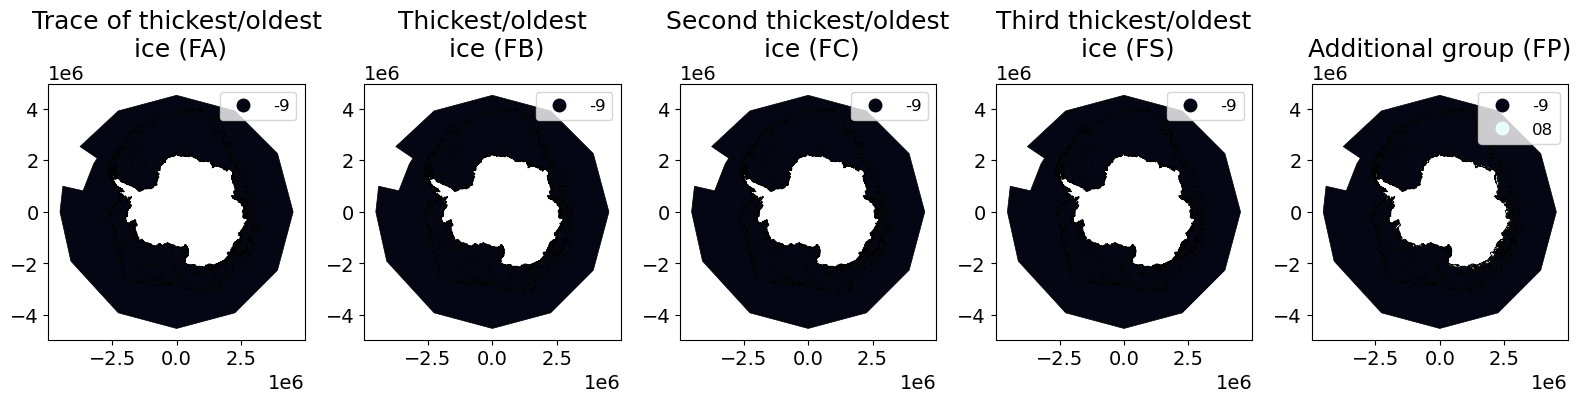

In [75]:
# 'FA', 'FB', 'FC',
       # 'FS', 'FP'

# 'SO', 'SA', 'SB', 'SC', 'SD'
fig, axes = plt.subplots(1, 5, figsize=(16, 6))  # 1 row, 2 columns

# First panel: FA
gdf_proj.plot(
    column="FA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Trace of thickest/oldest\n ice (FA)")

# Second panel: FB
gdf_proj.plot(
    column="FB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Thickest/oldest\n ice (FB)")

# Third panel: FC
gdf_proj.plot(
    column="FC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Second thickest/oldest\n ice (FC)")


# Fourth panel: FS
gdf_proj.plot(
    column="FS",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[3]  # assign to second subplot
)
axes[3].set_title("Third thickest/oldest\n ice (FS)")


# Fifth panel: FP
gdf_proj.plot(
    column="FP",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[4]  # assign to second subplot
)
axes[4].set_title("Additional group (FP)")


plt.tight_layout()
plt.show()

## Weekly Antarctic KMZ
The Antarctic KMZ file is created off the USNIC Weekly Antarctic ice analysis. The files contain SIGRID-3 information on ice conditions that are separated into total ice concentration, ice types with their respective concentrations, and ice floe size.

## Daily Text Files
Text files are based off the USNIC daily Antarctic ice analysis. Files created are in text latitude / longitude pairs for portability and can be parsed into various platforms and programs. The following are a detail of file contents and format:

- ASCII Format - general text format that outlines the ice edge to the nearest 1/10th of a degree.
    - **South ASCII** - outlines the ice edge
- Rainform OTH Format - text format with a DoD defined header
    - **MIZ** - outlines ice edge and marginal ice zone (concentration up to 80%) boundaries within the Arctic.
    - **Ice Extent** - outlines ice edge boundary

# Arctic

In [80]:
import os
region = 'arctic'
PATH = f'/g/data/ps29/nd0349/datasets/USNIC/ice_charts/{region}'
files = os.listdir(PATH)
print(files)

['arctic_line_2025317.kmz', 'nic_miz2025317nc_pl_a', 'arctic251107', 'ARCTIC_WEEKLY_2025_11_07.kmz', 'nmiz25.317']


## Daily Arctic Shapefile
Three GIS shapefiles are created off the USNIC daily Arctic ice analysis.

- MIZ - a vector analysis separating ice areas into 1 to 8 tenths and 8 to 10 tenths ice concentrations.
- Overlay - vector analysis separating ice and no ice.
- SPAROS - vector analysis representing ice edge, 100% boundary, and 48hr forecast lines.

## Daily KMZ Files
Two KMZ files are created with attributes defined by ice concentration.

- **Colorfill KMZ** - contains color-defined ice areas for the marginal ice zone (concentration up to 80%) in yellow and pack ice (ice concentration 80% and greater) in red
- **Vector KMZ** - contains color-defined ice lines for the ice edge in yellow and the marginal ice zone (concentration up to 80%) and pack ice boundary (ice concentration 80% and greater) in red.

## Weekly Arctic Shapefile
A GIS shapefile is created off the USNIC weekly Arctic ice analysis. A more thorough ice analysis than the daily ice analysis that separates ice areas to include total ice concentration, ice types with their respective concentrations and ice forms where applicable.

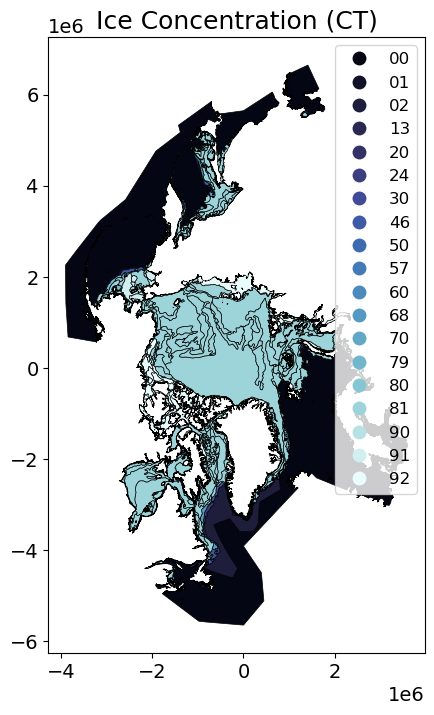

In [137]:
# Load shapefile
# shp_path = os.path.join(PATH, "arctic251107/ARCTIC251107.shp")
# arctic230210
yymmdd = "230210"
shp_path = os.path.join(PATH, f"arctic{yymmdd}/ARCTIC{yymmdd}.shp")
gdf = gpd.read_file(shp_path)

# Reproject
gdf_proj = gdf.to_crs(epsg=3413)

# Plot ice concentration (CT) with sequential palette
gdf_proj.plot(
    column="CT",              # ice concentration
    cmap=cmo.ice,      # sequential colormap
    edgecolor="black",
    linewidth=0.5,
    legend=True,              # produces a colorbar
    figsize=(8, 8),
)

plt.title("Ice Concentration (CT)")
plt.show()

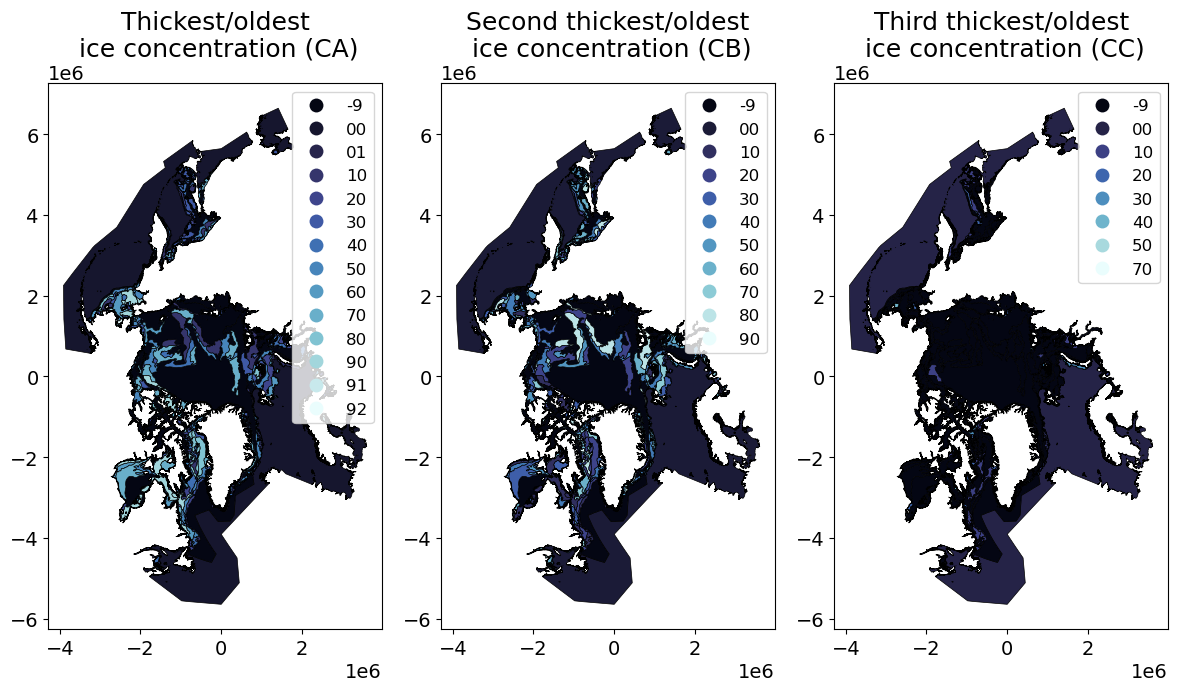

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))  # 1 row, 2 columns

# First panel: CA
gdf_proj.plot(
    column="CA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Thickest/oldest\n ice concentration (CA)")

# Second panel: CB
gdf_proj.plot(
    column="CB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Second thickest/oldest\n ice concentration (CB)")

# Third panel: CC
gdf_proj.plot(
    column="CC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Third thickest/oldest\n ice concentration (CC)")


plt.tight_layout()
plt.show()

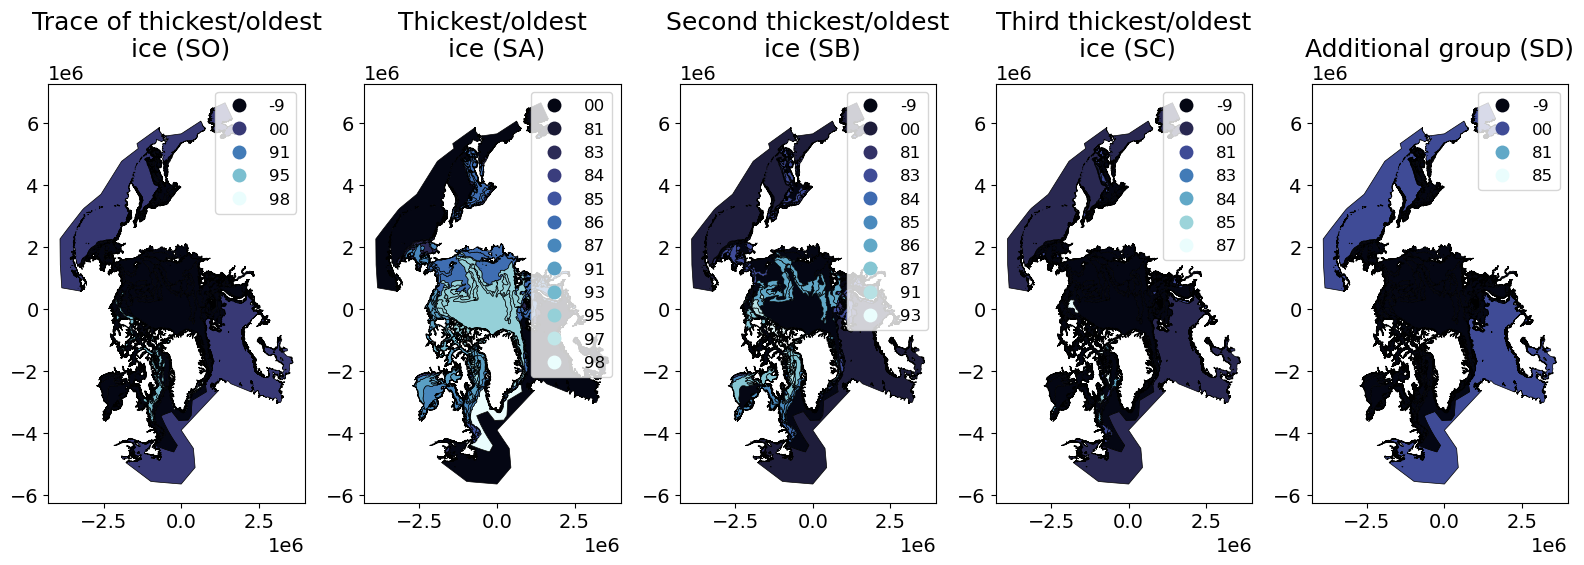

In [139]:
# 'SO', 'SA', 'SB', 'SC', 'SD'
fig, axes = plt.subplots(1, 5, figsize=(16, 6))  # 1 row, 2 columns

# First panel: SO
gdf_proj.plot(
    column="SO",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Trace of thickest/oldest\n ice (SO)")

# Second panel: SA
gdf_proj.plot(
    column="SA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Thickest/oldest\n ice (SA)")

# Third panel: SB
gdf_proj.plot(
    column="SB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Second thickest/oldest\n ice (SB)")


# Fourth panel: SC
gdf_proj.plot(
    column="SC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[3]  # assign to second subplot
)
axes[3].set_title("Third thickest/oldest\n ice (SC)")


# Fifth panel: SD
gdf_proj.plot(
    column="SD",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[4]  # assign to second subplot
)
axes[4].set_title("Additional group (SD)")


plt.tight_layout()
plt.show()

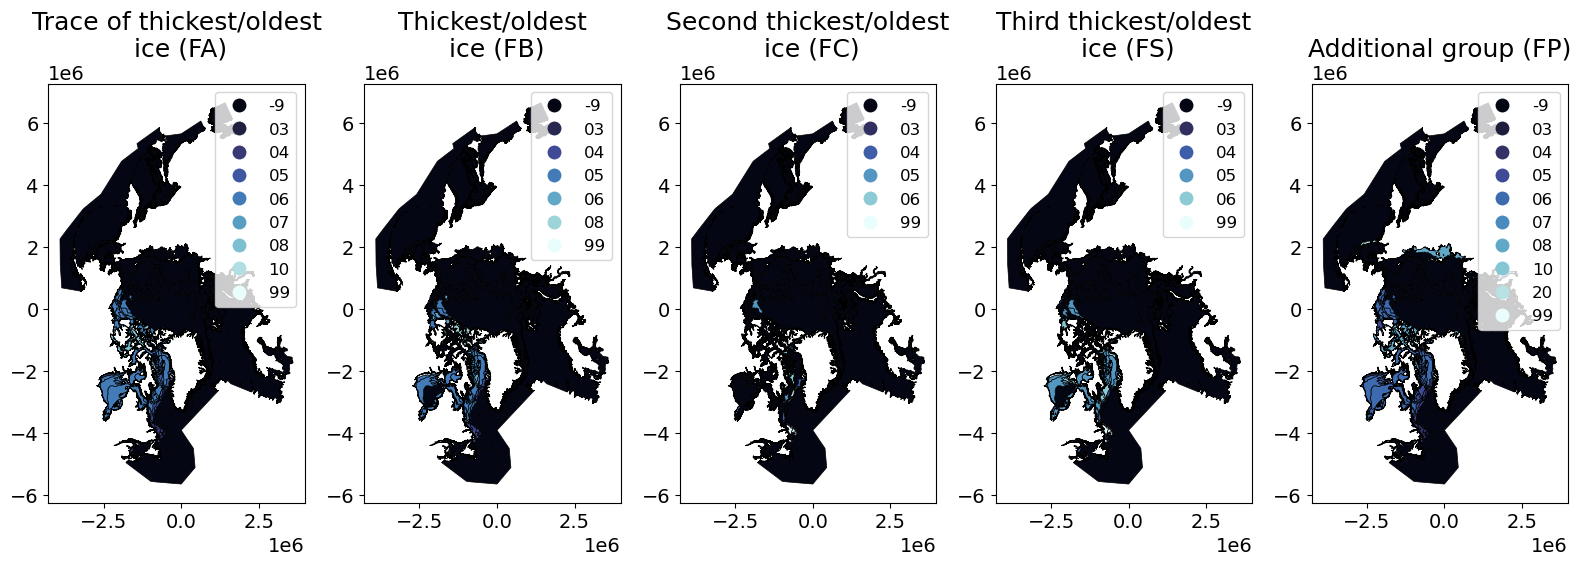

In [140]:
# 'FA', 'FB', 'FC', 'FS', 'FP'


fig, axes = plt.subplots(1, 5, figsize=(16, 6))  # 1 row, 2 columns

# First panel: FA
gdf_proj.plot(
    column="FA",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[0]  # assign to first subplot
)
axes[0].set_title("Trace of thickest/oldest\n ice (FA)")

# Second panel: FB
gdf_proj.plot(
    column="FB",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[1]  # assign to second subplot
)
axes[1].set_title("Thickest/oldest\n ice (FB)")

# Third panel: FC
gdf_proj.plot(
    column="FC",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[2]  # assign to second subplot
)
axes[2].set_title("Second thickest/oldest\n ice (FC)")


# Fourth panel: FS
gdf_proj.plot(
    column="FS",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[3]  # assign to second subplot
)
axes[3].set_title("Third thickest/oldest\n ice (FS)")


# Fifth panel: FP
gdf_proj.plot(
    column="FP",
    cmap=cmo.ice,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=axes[4]  # assign to second subplot
)
axes[4].set_title("Additional group (FP)")


plt.tight_layout()
plt.show()

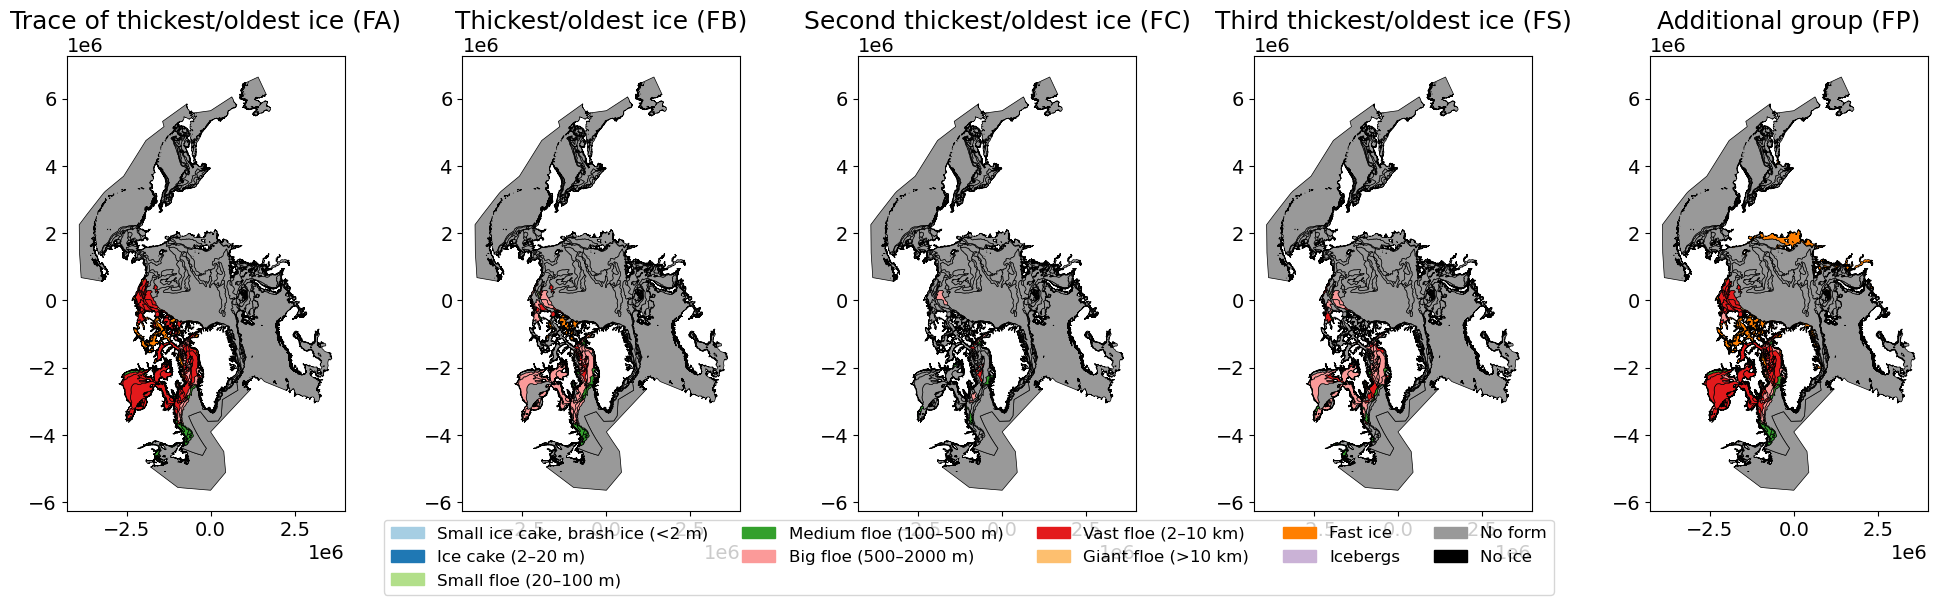

In [141]:
gdf = gpd.read_file(shp_path)
gdf_proj = gdf.to_crs(epsg=3413)

code_to_desc = {
    1: "Small ice cake, brash ice (<2 m)",
    2: "Ice cake (2–20 m)",
    3: "Small floe (20–100 m)",
    4: "Medium floe (100–500 m)",
    5: "Big floe (500–2000 m)",
    6: "Vast floe (2–10 km)",
    7: "Giant floe (>10 km)",
    8: "Fast ice",
    9: "Icebergs",
    -9: "No form",
    99: "No form",
    None: "No ice"
}

category_colors = {
    "Small ice cake, brash ice (<2 m)": "#a6cee3",
    "Ice cake (2–20 m)": "#1f78b4",
    "Small floe (20–100 m)": "#b2df8a",
    "Medium floe (100–500 m)": "#33a02c",
    "Big floe (500–2000 m)": "#fb9a99",
    "Vast floe (2–10 km)": "#e31a1c",
    "Giant floe (>10 km)": "#fdbf6f",
    "Fast ice": "#ff7f00",
    "Icebergs": "#cab2d6",
    "No form": "#999999",  # gray
    "No ice": "k",
}

# Map numeric codes to descriptions temporarily
temp_gdf = gdf_proj.copy()
for col in ["FA", "FB", "FC", "FS", "FP"]:
    temp_gdf[col] = temp_gdf[col].fillna(-9)
    temp_gdf[col + "_desc"] = temp_gdf[col].astype(int).map(code_to_desc)

fig, axes = plt.subplots(1, 5, figsize=(20, 6))

cols = ["FA", "FB", "FC", "FS", "FP"]
cols_desc = ["FA_desc", "FB_desc", "FC_desc", "FS_desc", "FP_desc"]
titles = [
    "Trace of thickest/oldest ice (FA)",
    "Thickest/oldest ice (FB)",
    "Second thickest/oldest ice (FC)",
    "Third thickest/oldest ice (FS)",
    "Additional group (FP)"
]

for ax, col, title in zip(axes, cols_desc, titles):
    # Only plot if column has any non-NaN values
    
    if temp_gdf[col].notna().any():
        colors = temp_gdf[col].fillna("No form").map(lambda x: category_colors.get(x, "#999999"))
        temp_gdf.plot(
            color=colors,
            edgecolor="black",
            linewidth=0.5,
            ax=ax
        )
        ax.set_title(title)

# Make a custom legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=color, label=label) for label, color in category_colors.items()]
fig.legend(handles=patches, loc='lower center', ncol=5)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.show()

## Weekly Arctic KMZ
The Arctic KMZ file is created off the USNIC Weekly Arctic ice analysis. The files contain SIGRID-3 information on ice conditions that are separated into total ice concentration, ice types with their respective concentrations, and ice floe size.

## Daily Text Files
Text files are based off the USNIC daily Arctic ice analysis. Files created are in latitude / longitude pairs for portability and can be parsed into various platforms and programs. The following are a detail of file contents and format: